In [46]:
#proyecto de reconocimiento de aves con redes neuronales convolucionales

#librerias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2





In [47]:
clases = []
etiquetas = []
imagenes = []

In [48]:
clases = os.listdir("./dataset/train")
print(clases)
n_clases = len(clases)
print(n_clases)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
15


In [49]:
#crear un array de imagenes y etiquetas
x = 0
for carpeta in clases:
    for img_name in os.listdir("./dataset/train/" + carpeta):
        img_path = os.path.join("./dataset/train/", carpeta, img_name)
        # Cargar la imagen con cv2
        image = cv2.imread(img_path)
        # Redimensionar la imagen a (100, 100)
        image = cv2.resize(image, (100, 100))
        # Convertir la imagen a un array NumPy
        image = np.asarray(image)
        # Agregar la imagen a la lista de imágenes
        imagenes.append(image)
        # Agregar la etiqueta correspondiente a la lista de etiquetas
        etiquetas.append(x)
    x += 1

In [50]:
# Convertir las listas de imágenes y etiquetas a arrays NumPy
imagenes = np.asanyarray(imagenes)

In [51]:
imagenes.shape

(15000, 100, 100, 3)

In [52]:
# Normalizar las imágenes
print(etiquetas)
etiquetas = np.asarray(etiquetas)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

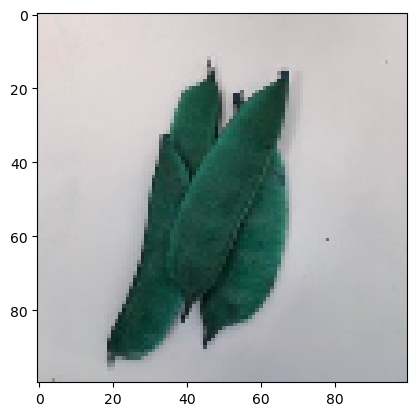

In [53]:
#ejemplo de imagen de ave que analiza el modelo
plt.figure()
plt.imshow(imagenes[9])
plt.grid(False)
plt.show()

In [54]:
#modelo preentrenado de vgg16
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
# Congelar capas del modelo base
base_model.trainable = False

# Definición del modelo de red neuronal convolucional
modelo = tf.keras.Sequential([
    # Capa de entrada con el modelo base de VGG16
    base_model,
    # Capa de aplanamiento de la salida de la capa base
    tf.keras.layers.GlobalAveragePooling2D(),
    
    # Capa densa con 256 unidades y activación ReLU
    tf.keras.layers.Dense(units=256, activation="relu"),

    # Capa de dropout con un 50% de neuronas apagadas durante el entrenamiento
    tf.keras.layers.Dropout(0.5),
    
    # Capa de salida con 15 unidades  y activación softmax
    tf.keras.layers.Dense(n_clases, activation="softmax")
])


In [55]:
#ajuste de la tasa de aprendizaje
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compilación del modelo
modelo.compile(
    # Método de optimización: "adam" es un método popular de optimización basado en el descenso de gradiente estocástico.
    optimizer=optimizer,
    # Función de pérdida: "sparse_categorical_crossentropy" es adecuada para problemas de clasificación multiclase donde las etiquetas son enteros.
    loss="sparse_categorical_crossentropy",
    # Métricas a seguir durante el entrenamiento y la evaluación: En este caso, se utiliza "accuracy" para calcular y mostrar la precisión.
    metrics=["accuracy"]
)



In [56]:
# Aumento de datos
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [57]:
import math
# Entrenamiento del modelo
modelo.fit(
    # Datos de entrada: imágenes de entrenamiento
    imagenes, 
    # Etiquetas correspondientes a las imágenes de entrenamiento
    etiquetas, 
    # Número de épocas (iteraciones completas sobre todo el conjunto de datos de entrenamiento)
    epochs=40, 
    # Número total de pasos (batches de datos) para completar una época
    steps_per_epoch=math.ceil(len(imagenes)/80),
    # Reducir el tamaño del batch
    batch_size=80
)


Epoch 1/40
188/188 [==============================] - 16s 69ms/step - loss: 2.0037 - accuracy: 0.7759
Epoch 2/40
188/188 [==============================] - 13s 67ms/step - loss: 0.2530 - accuracy: 0.9291
Epoch 3/40
188/188 [==============================] - 12s 66ms/step - loss: 0.1488 - accuracy: 0.9571
Epoch 4/40
188/188 [==============================] - 12s 66ms/step - loss: 0.0997 - accuracy: 0.9686
Epoch 5/40
188/188 [==============================] - 13s 67ms/step - loss: 0.0762 - accuracy: 0.9757
Epoch 6/40
188/188 [==============================] - 13s 67ms/step - loss: 0.0581 - accuracy: 0.9819
Epoch 7/40
188/188 [==============================] - 13s 67ms/step - loss: 0.0469 - accuracy: 0.9841
Epoch 8/40
188/188 [==============================] - 12s 66ms/step - loss: 0.0447 - accuracy: 0.9863
Epoch 9/40
188/188 [==============================] - 31s 168ms/step - loss: 0.0380 - accuracy: 0.9878
Epoch 10/40
188/188 [==============================] - 10s 51ms/step - loss: 0.03

In [61]:
# Obtener predicciones del modelo en el conjunto de prueba
predicciones = modelo.predict(imagenes)

# Comparar predicciones con etiquetas verdaderas
for i in range(len(predicciones)):
    prediccion_clase = np.argmax(predicciones[i])
    etiqueta_verdadera = etiquetas[i]
    if prediccion_clase != etiqueta_verdadera:
        print(f"Predicción incorrecta para la imagen {i}: Predicción: {prediccion_clase}, Etiqueta verdadera: {etiqueta_verdadera}")
        # Aquí podrías mostrar la imagen para visualizar el error

469/469 [==============================] - 6s 14ms/step
Predicción incorrecta para la imagen 5568: Predicción: 8, Etiqueta verdadera: 5
Predicción incorrecta para la imagen 6137: Predicción: 10, Etiqueta verdadera: 6


In [59]:
#guardar el modelo
modelo.save("./models/tf_model_vegetales.h5")

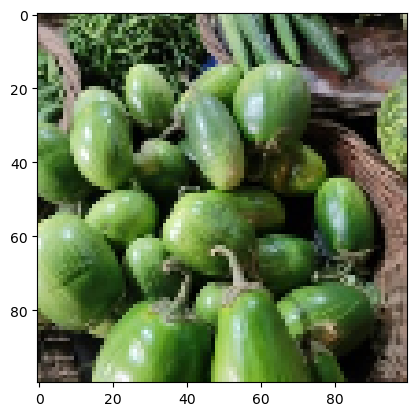

(1, 100, 100, 3)
1/1 [==============================] - 0s 18ms/step


'Brinjal'

In [62]:
# Cargar la imagen usando OpenCV y redimensionarla
im_cv2 = cv2.imread("./dataset/test/Brinjal/1005.jpg")
im_cv2 = cv2.resize(im_cv2, (100, 100))

# Convertir la imagen a formato RGB
im_rgb = cv2.cvtColor(im_cv2, cv2.COLOR_BGR2RGB)

# Agregar una dimensión adicional para la muestra
test = np.expand_dims(im_rgb, axis=0)
#mostrar la imagen
plt.figure()
plt.imshow(im_rgb)
plt.grid(False)
plt.show()

# Verificar las dimensiones de la imagen resultante
print(test.shape)

# Realizar la predicción
prediccion = modelo.predict(test)
clases[np.argmax(prediccion[0])]
